<a href="https://colab.research.google.com/github/Tunyalucklie/lantech/blob/main/Project_Language_Tech_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Sentiment analysis for content moderation in social media communities**




picture

brief project explanation

In [1]:
import os
import math

import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download("punkt")
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

# Download Dataset

In [2]:
training_data = pd.read_csv("https://raw.githubusercontent.com/Tunyalucklie/lantech/main/training_data_project.csv",encoding='utf-8')
testing_data = pd.read_csv("https://raw.githubusercontent.com/Tunyalucklie/lantech/main/testing_data_project.csv",encoding='utf-8')

Dataset information: .....

# Analysis on Sentence, Words and Class

In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25414 entries, 0 to 25413
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Content  25414 non-null  object
 1   Label    25414 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 397.2+ KB


In [ ]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10892 entries, 0 to 10891
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Content  10892 non-null  object
 1   Label    10892 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 170.3+ KB


In [ ]:
training_data.head(5)

,Content,Label
0,oppose removal after reading the above comment...,0
1,deleting my entries i have made several contri...,0
2,levi general takes stand end gun violence fran...,1
3,vojsku not applicable granite i sve to resit p...,1
4,the replies to this tweet illustrate the diffe...,0


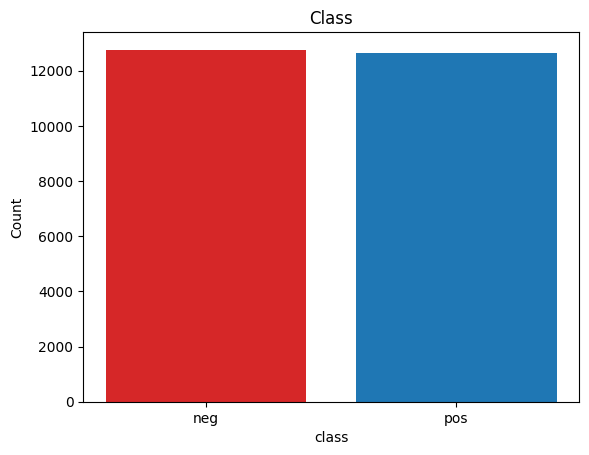

In [14]:
#class value
label_counts = training_data['Label'].value_counts()
labels = ['neg', 'pos']
colors = ['tab:red', 'tab:blue']

plt.title('Class')
plt.xlabel('class')
plt.ylabel('Count')
plt.bar(labels, label_counts, color=colors)
plt.show()

<Axes: >

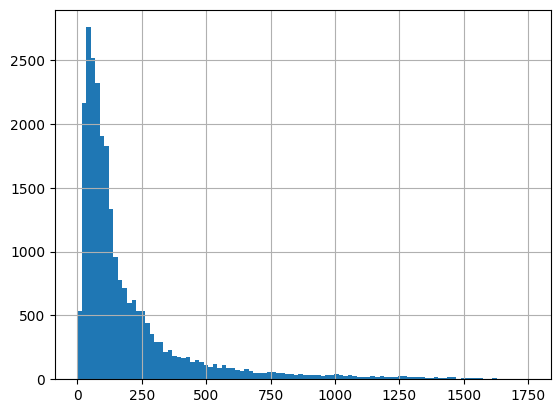

In [15]:
#sentence length
training_data['Content'].str.len().hist(bins=100,range=(0,1750) )

<Axes: >

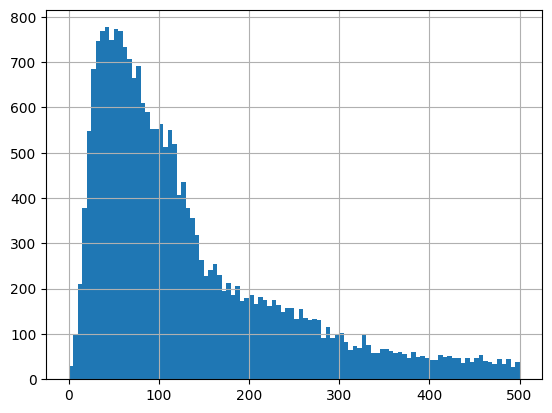

In [16]:
#sentence length
training_data['Content'].str.len().hist(bins=100,range=(0,500) )

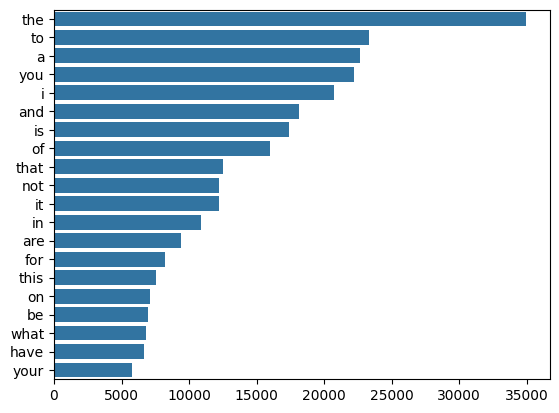

In [24]:
#word_count
from collections import Counter

def graph_wordcount(text):

    stop=set(stopwords.words('english'))
    corpus=[]
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter= Counter(corpus)
    most=counter.most_common()

    x, y= [], []
    for word,count in most[:20]:
            x.append(word)
            y.append(count)

    sns.barplot(x=y,y=x)

graph_wordcount(training_data['Content'])

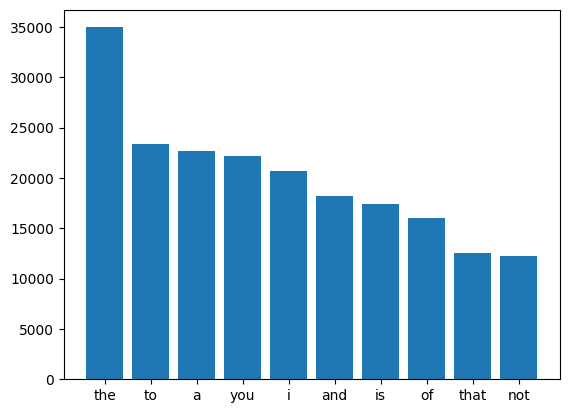

In [25]:
#count stopword
def graph_stopwordcount(text):

    stop=set(stopwords.words('english'))
    corpus=[]
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1

    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.bar(x,y)

graph_stopwordcount(training_data['Content'])

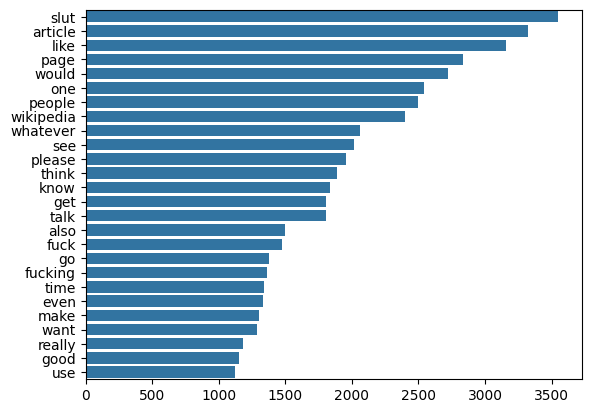

In [27]:
def graph_nonstop_wordcount(text):

    stop=set(stopwords.words('english'))
    corpus=[]
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter= Counter(corpus)
    most=counter.most_common()

    x, y= [], []
    for word,count in most[:100]:
        if (word not in stop):
            x.append(word)
            y.append(count)

    sns.barplot(x=y,y=x)

graph_nonstop_wordcount(training_data['Content'])

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx])
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

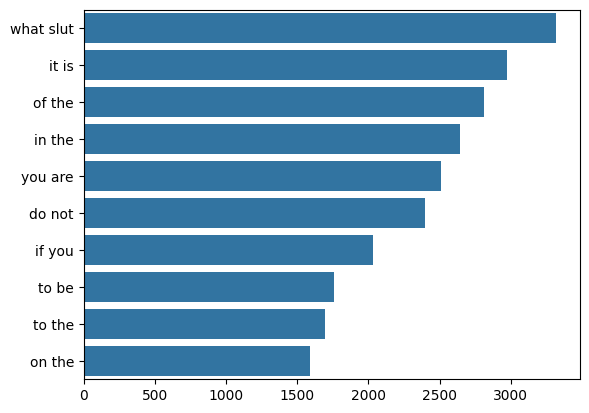

In [29]:
#top bi-gram

plot_top_ngrams_barchart(training_data['Content'],2)

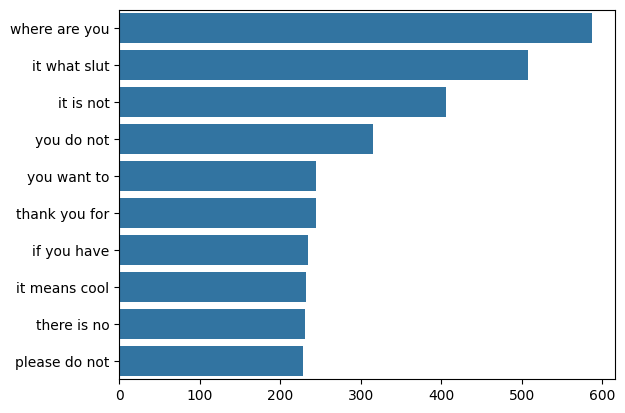

In [30]:
#top tri-gram
plot_top_ngrams_barchart(training_data['Content'],3)

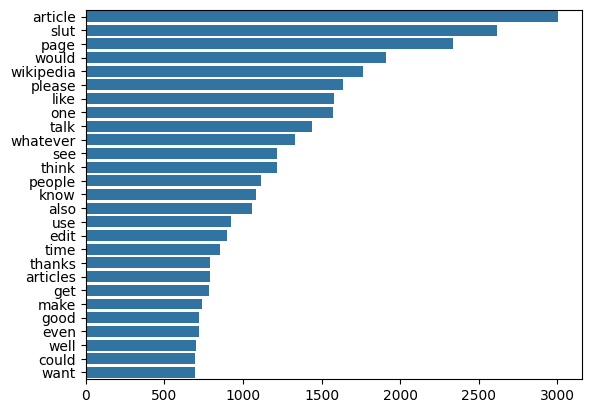

In [46]:
#negative label word count
neg_text = training_data.loc[training_data['Label'] == 0, ['Content']]
graph_nonstop_wordcount(neg_text['Content'])


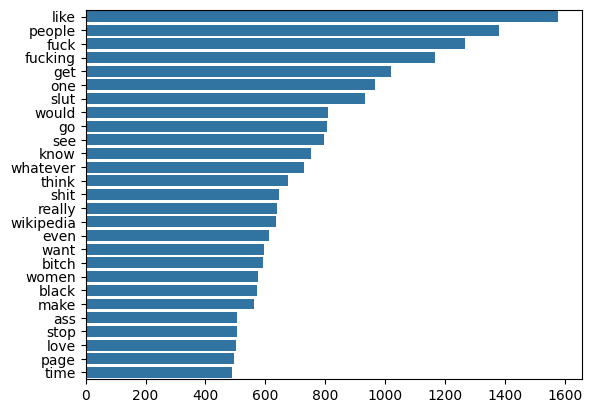

In [34]:
#positive label word count
pos_text = training_data.loc[training_data['Label'] == 1, ['Content']]
graph_nonstop_wordcount(pos_text["Content"])

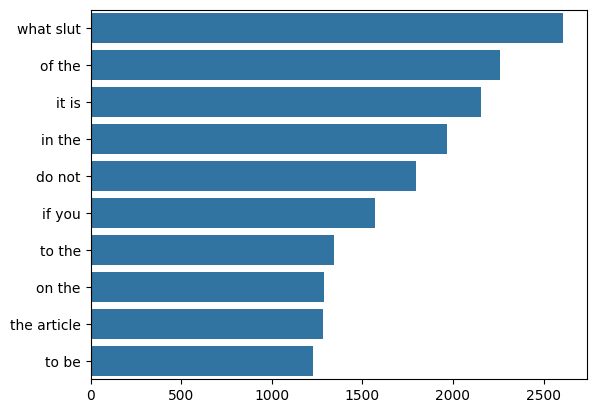

In [35]:
#negative bigram
plot_top_ngrams_barchart(neg_text['Content'], n=2)

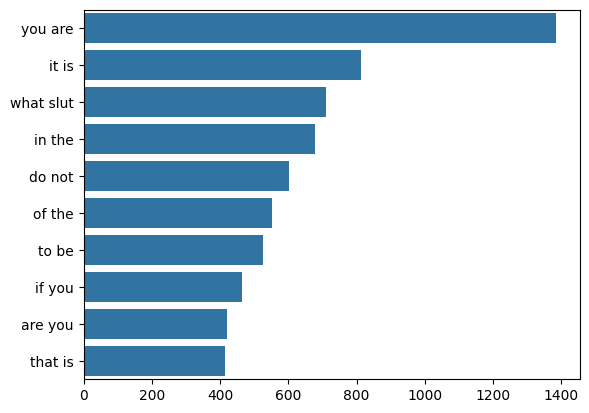

In [36]:
#positive bigram
plot_top_ngrams_barchart(pos_text['Content'], n=2)

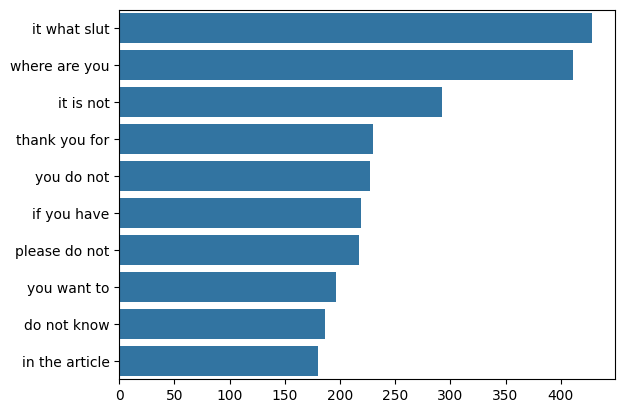

In [37]:
#negative tri-gram
plot_top_ngrams_barchart(neg_text['Content'],3)

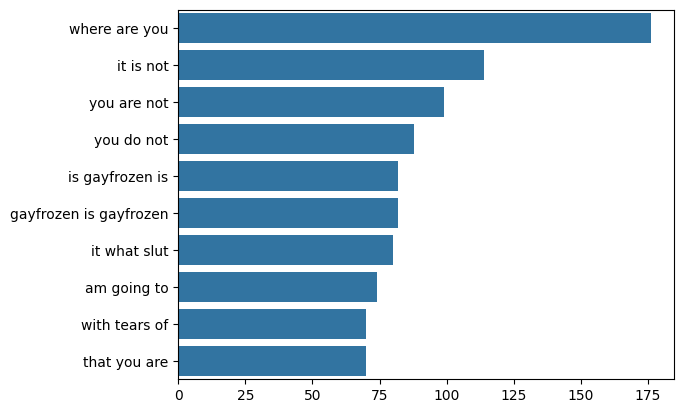

In [38]:
#positive trigram
plot_top_ngrams_barchart(pos_text['Content'],3)

<Axes: >

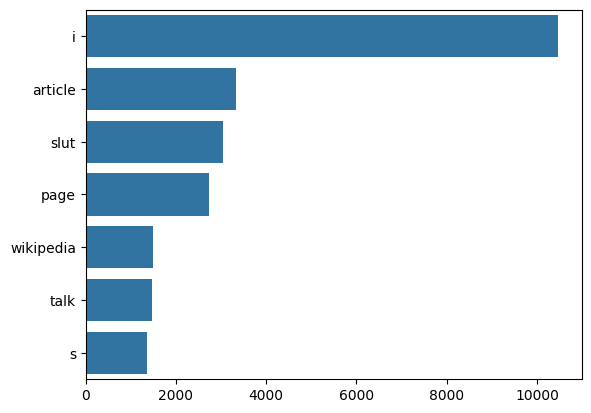

In [39]:
# pos, verb
from nltk.tokenize import word_tokenize
from collections import Counter

def get_adjs(text):
    adj=[]
    pos=nltk.pos_tag(word_tokenize(text))
    for word,tag in pos:
        if tag=='NN':
            adj.append(word)
    return adj

words = training_data['Content'].apply(lambda x : get_adjs(x))
words = [x for l in words for x in l]
counter=Counter(words)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

In [50]:
def word_filter(df, word):
    mask = df['Content'].apply(lambda text: word in text.split())
    df = df.loc[mask].reset_index(drop=True)
    return df

In [52]:
neg = word_filter(neg_text,'slut')
neg

,Content
0,meowy i have yet to expand this article really...
1,old debate hmmmm i seem to recall immediately ...
2,i changed the date from to the reference is a ...
3,is this a defensive stand for theo or an offen...
4,regarding restoring my user page yes duh i for...
...,...
1778,jeff william connelly is a moderator at wikipe...
1779,utc decline there is a good deal of truth in w...
1780,ira black musician dear hayworth i would like ...
1781,joey needed joey needed what a slut born


In [51]:
pos = word_filter(pos_text,'slut')
pos

,Content
0,now the user is you zimmerman what a slut thro...
1,nazi crime what a slut a result of pan germani...
2,my neighbor who is a mixed race transgender wo...
3,unwarranted block please explain why you block...
4,ok mr sarky since you dress non check your fac...
...,...
703,my best friend who is allergic to wheat corn s...
704,shut the fuck up you pussy clearly the white g...
705,my grandmother what a slut telling me that she...
706,why do not you tell that to the idiot who says...


# Preprocessing
- data praparation for training

In [ ]:
def text_clean(text, method, rm_stop):
    text = re.sub(r"\n","",text)   #remove line breaks
    text = text.lower() #convert to lowercase
    text = re.sub(r"\d+","",text)   #remove digits and currencies
    text = re.sub(r'[\$\d+\d+\$]', "", text)
    text = re.sub(r'\d+[\.\/-]\d+[\.\/-]\d+', '', text)   #remove dates
    text = re.sub(r'\d+[\.\/-]\d+[\.\/-]\d+', '', text)
    text = re.sub(r'\d+[\.\/-]\d+[\.\/-]\d+', '', text)
    text = re.sub(r'[^\x00-\x7f]',r' ',text)   #remove non-ascii
    text = re.sub(r'[^\w\s]','',text)   #remove punctuation
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)   #remove hyperlinks

    #remove stop words
    if rm_stop == True:
        filtered_tokens = [word for word in word_tokenize(text) if not word in set(stopwords.words('english'))]
        text = " ".join(filtered_tokens)

    #lemmatization: typically preferred over stemming
    if method == 'L':
        lemmer = WordNetLemmatizer()
        lemm_tokens = [lemmer.lemmatize(word) for word in word_tokenize(text)]
        return " ".join(lemm_tokens)

    #stemming
    if method == 'S':
        porter = PorterStemmer()
        stem_tokens = [porter.stem(word) for word in word_tokenize(text)]
        return " ".join(stem_tokens)

    return text

In [3]:
#define x train, y_train
X_train, Y_train = np.array(training_data['Content']), np.array(training_data['Label'])
X_test, Y_test = np.array(testing_data['Content']), np.array(testing_data['Label'])

In [ ]:
#data without preprocessing
text_0 = X_train

#preprocessed data: Lemm + stopword removal
preprocessed_text_1 = [text_clean(text, 'L', True) for text in X_train]
#preprocessed_text_1[0:10]

#preprocessed data: Lemm + no stopword removal
preprocessed_text_2 = [text_clean(text, 'L', False) for text in X_train]
#preprocessed_text_2[0:10]

#preprocessed data: Stem + stopword removal
preprocessed_text_3 = [text_clean(text, 'S', True) for text in X_train]
#preprocessed_text_3[0:10]

#preprocessed data: Stem + no stopword removal
preprocessed_text_4 = [text_clean(text, 'S', False) for text in X_train]
#preprocessed_text_4[0:10]

# System Development
- training models including NaiveBayes clssifer, SVM and LSTM
- Intrinsic evalution on each models
- optimization on each models


# NaiveBayes Model

lab method

In [53]:
#make data structure
# zero is positive , one is negative
train_dict = [{'words': sentence.split(), 'class': 'neg' if label == 1 else 'pos'} for sentence, label in zip(X_train, Y_train)]
test_dict = [{'words': sentence.split(), 'class': 'neg' if label == 1 else 'pos'} for sentence, label in zip(X_test, Y_test)]

print(train_dict[0])
print(test_dict[0])

{'words': ['the', 'least', 'controversial', 'pms', 'are', 'those', 'commonly', 'known', 'as', 'instincts', 'including', 'human', 'capacities', 'for', 'digestion', 'interpreting', 'stereoscopic', 'vision', 'suckling', 'a', 'mother', 's', 'breast', 'etc', 'i', 'does', 'not', 'know', 'that', 'digestion', 'is', 'a', 'psychological', 'process', 'or', 'type', 'of', 'behavior', 'it', 'is', 'a', 'physiological', 'biochemical', 'process', 'largely', 'outside', 'the', 'bounds', 'of', 'cognitive', 'action', 'i', 'do', 'not', 'believe', 'it', 'belongs', 'grouped', 'with', 'instincts'], 'class': 'pos'}
{'words': ['mark', 'are', 'you', 'really', 'an', 'entity', 'made', 'of', 'pure', 'energy', 'is', 'your', 'ass', 'still', 'painful'], 'class': 'neg'}


In [54]:
class NaiveBayes(object):

    def predict(self, d): #d is data, represent a sentense
        # TODO: Replace the following line with your own code to solve Problem 2
        pr_P=0 #positive
        pr_N=0 #negative
        for word in d:
            if word in self.vocabulary:
                pr_P=pr_P+self.pw['pos'][word] #pw means Pr(w|c)
                pr_N=pr_N+self.pw['neg'][word]
            else:
                pass
        pr_P=pr_P+self.pc['pos']
        pr_N=pr_N+self.pc['neg']
        # print("predict finished")
        if(pr_P>pr_N):
            return 'pos'
        else:
            return 'neg'


    @classmethod
    def train(cls, data, k=1):
        # The following line creates a new object of type OurClassifier:
        classifier = cls()
        # The next few lines initialise the four attributes of the classifier:
        classifier.classes = set()
        classifier.vocabulary = set()
        classifier.pc = {}
        classifier.pw = {}

        # TODO: Insert code to solve Problem 2

        for i in range(len(data)): #create classes and count occurance numbers
            newclass=data[i]['class']
            if newclass not in classifier.classes:
                classifier.classes.add(newclass) #add newclass
                classifier.pc[newclass]=1        #initialize the occurance number of this new class
                classifier.pw[newclass]={}        #create the new class dictionary of probability

            else:
                classifier.pc[newclass]+=1       #increment occurrence count of the existing class by 1

        for classes in classifier.pc: #calculate probabilities of classes
            classifier.pc[classes]=math.log(classifier.pc[classes]/len(data))

        for i in range(len(data)): #create vocabulary and count occurance numbers
            thisclass=data[i]['class']
            sentence=data[i]['words']
            for words in sentence:
                if words not in classifier.vocabulary: #if we find a new word
                    classifier.vocabulary.add(words)
                    for c in classifier.classes:
                        classifier.pw[c][words]=k
                    classifier.pw[thisclass][words]+=1
                else:
                    classifier.pw[thisclass][words]+=1
        for c in classifier.pw:
            total=sum(list(classifier.pw[c].values()))
            for word in classifier.pw[c]:
                classifier.pw[c][word]=math.log(classifier.pw[c][word]/total)

        return classifier

In [55]:
#evaluation in-class method

#yeokwoon...
def accuracy(classifier, samples):
    """Compute the accuracy of a classifier on a list of gold-standard samples."""
    # TODO: Implement this method to solve Problem 2
    correct_pred = 0
    for sample in samples:
        if classifier.predict(sample['words']) == sample['class']:
            correct_pred = correct_pred + 1
    return 0 if len(samples) == 0 else float(correct_pred/len(samples))

def precision(classifier, c, samples):
    """Compute the class-specific precision of a classifier on a list of gold-standard samples."""
    # TODO: Implement this method to solve Problem 2
    total_class_predictions = 0
    correct_class_predictions = 0
    for sample in samples:
        prediction = classifier.predict(sample['words'])
        if prediction != c:
            continue
        total_class_predictions = total_class_predictions + 1
        if sample['class'] == prediction:
            correct_class_predictions = correct_class_predictions + 1
    return 0 if total_class_predictions == 0 else float(correct_class_predictions/total_class_predictions)

def recall(classifier, c, samples):
    """Compute the class-specific recall of a classifier on a list of gold-standard samples."""
    # TODO: Implement this method to solve Problem 2
    correct_class_predictions = 0
    total_of_class = 0
    for sample in samples:
        prediction = classifier.predict(sample['words'])
        if sample['class'] != c:
            continue
        total_of_class = total_of_class + 1
        if sample['class'] == prediction:
            correct_class_predictions = correct_class_predictions + 1
    return 0 if total_of_class == 0 else float(correct_class_predictions/total_of_class)

def our_evaluate(classifier, samples):
    print("accuracy = {:.2%}".format(accuracy(classifier, samples)))
    for c in sorted(classifier.classes):
        p = precision(classifier, c, samples)
        r = recall(classifier, c, samples)
        # TODO: Change the next line to compute the F1-score
        f = (2*p*r)/(p+r)
        print("class {}: precision = {:.2%}, recall = {:.2%}, f1 = {:.2%}".format(c, p, r, f))


In [56]:
classifier=NaiveBayes.train(train_dict)
our_evaluate(classifier, test_dict)

accuracy = 78.47%
class neg: precision = 74.06%, recall = 87.94%, f1 = 80.40%
class pos: precision = 84.99%, recall = 68.92%, f1 = 76.11%


outsource libralies

In [12]:
#evaluation
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score, accuracy_score, balanced_accuracy_score

def evaluation(Y_test, predictions):
    accuracy = accuracy_score( Y_test, predictions)
    precision = precision_score(Y_test, predictions)
    recall = recall_score(Y_test, predictions)

    print("Accuracy:",round(100*accuracy,2),'%')
    print("Precision:", round(100*precision,2),'%')
    print("Recall:", round(100*recall,2),'%')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


#Extract features from the text data: Bow vectorizing, training , predicting
def predictions_modelNB(X_train,Y_train):
    #vectorize dataset to Bow -> Learn the vocabulary dictionary and return term-document matrix
    vectorizer = CountVectorizer()
    vectorized_X_train = vectorizer.fit_transform(X_train)

    #train model with add 0.1 smooth
    model = MultinomialNB(alpha=0.1)
    model.fit(vectorized_X_train, Y_train)

    #predict_model
    predictions = model.predict(vectorizer.transform(X_test))

    return predictions

In [ ]:
# first attemp
prediction_0 = predictions_modelNB(text_0 , Y_train)
evaluation(Y_test, prediction_0)

Accuracy: 78.28 %
Balanced accuracy: 78.23 %
Precision: 73.68 %
Recall: 88.3 %


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#more this part whats data look like after transform
vectorizer = CountVectorizer()
vectorized_X_train = vectorizer.fit_transform(X_train)
vectorized_X_train = np.array(vectorized_X_train.todense())

In [ ]:
vectorized_X_train[0]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
vectorized_X_train.shape

(25414, 36345)

In [ ]:
#other style text
prediction_1 = predictions_modelNB(preprocessed_text_1, Y_train)
prediction_2  = predictions_modelNB(preprocessed_text_2, Y_train)
prediction_3  = predictions_modelNB(preprocessed_text_3, Y_train)
prediction_4  = predictions_modelNB(preprocessed_text_4, Y_train)

In [ ]:
# with clean data
#vectorize, model, and evaluate model using CountVectorizer

#Lemm + stopword removal
print("Lemm + stopword removal + CountVectorizer")
evaluation(Y_test, prediction_1)

#Lemm + no stopword removal
print("\nLemm + no stopword removal + CountVectorizer")
evaluation(Y_test, prediction_2)

#Stem + stopword removal
print("\nStem + stopword removal + CountVectorizer")
evaluation(Y_test, prediction_3)

#Stem + no stopword removal
print("\nStem + no stopword removal + CountVectorizer")
evaluation(Y_test, prediction_4)

Lemm + stopword removal + CountVectorizer
Accuracy: 75.57 %
Balanced accuracy: 75.54 %
Precision: 72.96 %
Recall: 81.61 %

Lemm + no stopword removal + CountVectorizer
Accuracy: 77.2 %
Balanced accuracy: 77.16 %
Precision: 73.11 %
Recall: 86.38 %

Stem + stopword removal + CountVectorizer
Accuracy: 66.05 %
Balanced accuracy: 65.95 %
Precision: 61.32 %
Recall: 87.79 %

Stem + no stopword removal + CountVectorizer
Accuracy: 74.78 %
Balanced accuracy: 74.74 %
Precision: 71.27 %
Recall: 83.4 %


# SVM Model

In [ ]:
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer()
x_train_vectorize = vectorizer.fit_transform(X_train)
x_test_vectorize = vectorizer.transform(X_test)
svm_classifier = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
svm_classifier.fit(x_train_vectorize, Y_train)
prediction = svm_classifier.predict(x_test_vectorize)


0.7778185824458318


In [ ]:
print(evaluation(prediction, Y_test))

Accuracy: 77.78 %
Precision: 79.62 %
Recall: 76.95 %
None


# LSTM Model

In [4]:
# Import the necessary libraries
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from keras.callbacks import EarlyStopping
from keras.models import Sequential


# Preprocess the text data using a Tokenizer
max_words = 3000
max_len = 500
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
X = pad_sequences(sequences, maxlen=max_len)

# Build the model
# Define parameter
n_lstm = 128
drop_lstm = 0.2
embedding_dim = 16

# Define LSTM Model
model1 = Sequential()
model1.add(Embedding(max_words, embedding_dim, input_length=max_len))
model1.add(SpatialDropout1D(drop_lstm))
model1.add(LSTM(n_lstm, return_sequences=False))
model1.add(Dropout(drop_lstm))
model1.add(Dense(1, activation='sigmoid'))

# Compile and train the model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model1.fit(X, Y_train, validation_split=0.2, epochs=30, callbacks=[early_stopping])

Epoch 1/30
636/636 [==============================] - 456s 712ms/step - loss: 0.5411 - accuracy: 0.7152 - val_loss: 0.4473 - val_accuracy: 0.7860
Epoch 2/30
636/636 [==============================] - 460s 724ms/step - loss: 0.4205 - accuracy: 0.8058 - val_loss: 0.4337 - val_accuracy: 0.7921
Epoch 3/30
636/636 [==============================] - 454s 715ms/step - loss: 0.3877 - accuracy: 0.8215 - val_loss: 0.4329 - val_accuracy: 0.7934
Epoch 4/30
636/636 [==============================] - 454s 714ms/step - loss: 0.3775 - accuracy: 0.8304 - val_loss: 0.4336 - val_accuracy: 0.7915
Epoch 5/30
636/636 [==============================] - 451s 709ms/step - loss: 0.3557 - accuracy: 0.8389 - val_loss: 0.4415 - val_accuracy: 0.7863
Epoch 6/30
636/636 [==============================] - 452s 710ms/step - loss: 0.3392 - accuracy: 0.8489 - val_loss: 0.4631 - val_accuracy: 0.7926
Epoch 7/30
636/636 [==============================] - 450s 708ms/step - loss: 0.3261 - accuracy: 0.8528 - val_loss: 0.4627 -

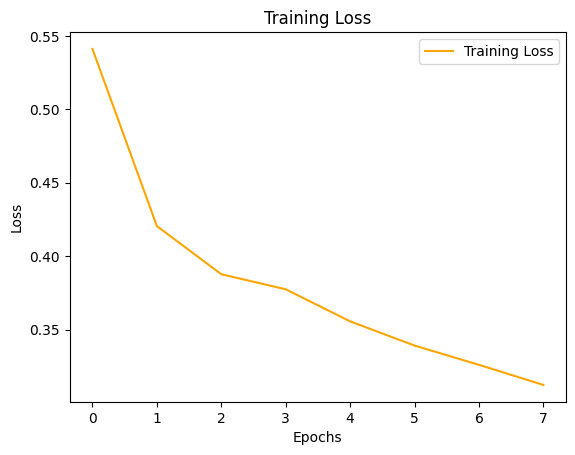

In [6]:
import matplotlib.pyplot as plt
# Plot the loss graph
plt.plot(model1.history.history['loss'], label='Training Loss', color="orange")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

In [7]:
# Predict the class of a new text
new_sequences = tokenizer.texts_to_sequences(X_test)
new_X = pad_sequences(new_sequences, maxlen=max_len)
prediction_lstm = model1.predict(new_X)
#print(prediction_lstm_0 )  # Output: [[0.5]]

341/341 [==============================] - 97s 277ms/step


In [8]:
prediction_lstm_0 = np.where(prediction_lstm >= 0.5, 1, 0)

In [13]:
evaluation(Y_test,prediction_lstm_0)

Accuracy: 78.52 %
Precision: 77.74 %
Recall: 80.19 %


# Systems Evaluation and Result Analysis

Testing model with xxxx data
This data is from ......

**Comparison Performance on Different Models**

performance on testing dataset

performance on xxx dataset

This illustration compares the final results

Final model will be : ...

compare with BERT,....

# Model Deployment

In [ ]:
# model input - prompt
input_text = ''

# pred_result = predict_NB(input_text)
# pred_result = predict_SVM(input_text)
# pred_result = predict_LSTM(input_text)